# Initial EDA - Failure 0 (dataset 00)

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
pyo.init_notebook_mode(connected=True)

# import plotly_express as px

from ipywidgets import interact

In [20]:
import missingno as msno

In [24]:
file = 'd00'

In [25]:
# Reading files
d00_test = pd.read_csv('../data/'+file+'.dat', sep='\s+', header=None).T
d00_train = pd.read_csv('../data/'+file+'_te.dat', sep='\s+', header=None)

# Renaming columns (columns as integers is not good)
d00_test.columns = ['f'+str(i) for i in range(0,52)]
d00_train.columns = ['f'+str(i) for i in range(0,52)]

# Unifying dataset
d00 = pd.concat([d00_train, d00_test])

In [29]:
d00_train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51
0,0.24889,3702.3,4502.7,9.4170,26.996,42.183,2705.2,75.173,120.40,0.33611,...,54.059,24.804,63.269,21.950,40.188,39.461,47.000,47.594,41.384,18.905
1,0.24904,3666.2,4526.0,9.2682,26.710,42.332,2705.5,74.411,120.41,0.33676,...,53.781,24.790,62.171,22.239,40.108,43.710,46.128,47.508,41.658,18.976
2,0.25034,3673.3,4501.3,9.4212,26.842,42.360,2705.3,75.125,120.41,0.33739,...,54.075,24.669,61.585,22.191,40.030,39.480,44.121,47.612,41.721,16.562
3,0.25109,3657.8,4497.8,9.3792,26.528,41.982,2707.3,73.992,120.38,0.33664,...,54.117,24.595,61.561,21.959,40.121,32.848,45.858,47.459,40.836,20.094
4,0.24563,3698.0,4537.4,9.3746,26.736,42.354,2705.3,75.283,120.42,0.32521,...,53.906,24.451,61.388,22.271,39.538,36.682,45.753,47.458,41.727,18.330
5,0.24759,3687.4,4538.0,9.3535,26.792,42.663,2704.0,75.339,120.40,0.32764,...,53.900,24.258,63.379,21.974,39.242,39.212,50.477,47.498,40.922,19.532
6,0.24689,3619.7,4537.9,9.1492,27.201,42.401,2702.7,75.919,120.38,0.33336,...,53.969,24.729,63.247,22.456,39.674,32.506,44.016,47.524,40.562,21.019
7,0.24986,3624.4,4578.5,9.3023,26.906,42.210,2701.9,74.850,120.38,0.33448,...,53.484,24.437,62.430,22.067,39.537,41.191,46.008,47.436,40.627,19.548
8,0.30012,3653.0,4453.5,9.3467,26.913,42.079,2703.9,75.503,120.41,0.34522,...,54.282,29.190,61.545,21.939,40.193,39.275,49.075,47.392,40.684,18.228
9,0.29736,3720.7,4532.6,9.3131,26.994,42.630,2706.3,74.807,120.41,0.33947,...,53.335,29.462,60.632,22.393,40.894,34.598,43.882,47.285,41.650,16.776


In [4]:
@interact(x = d00.columns)

def f(x):
    data = go.Scatter(x = d00_train.index, y= d00_train[x])
    layout = go.Layout(title = 'Feature '+x[1:], height=400, template='plotly_white')
    fig = go.Figure(data = data, layout = layout)
    pyo.iplot(fig)

interactive(children=(Dropdown(description='x', options=('f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',…

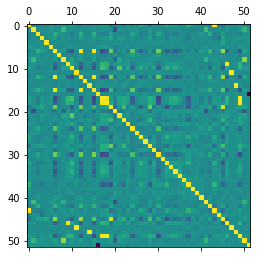

In [5]:
plt.matshow(d00.corr())

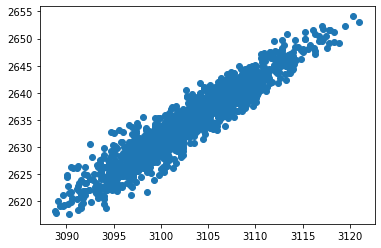

In [6]:
plt.scatter(d00['f15'],d00['f12'])

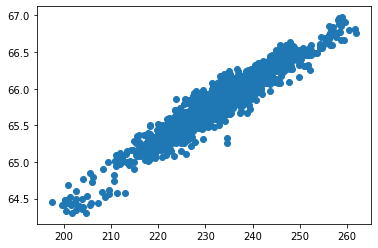

In [7]:
plt.scatter(d00['f18'],d00['f17'])

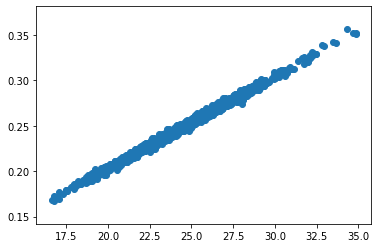

In [8]:
plt.scatter(d00['f43'],d00['f0'])

## Distributions

In [9]:
@interact(x = d00.columns)

def f(x):
    sns.distplot(d00[[x]])
    plt.title(x)
    plt.show()

interactive(children=(Dropdown(description='x', options=('f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',…

### Pandas profiling

In [10]:
# import pandas_profiling

# profile = d00.profile_report(title='Failure 0 Profile Report')
# profile.to_file(output_file="../reports/d00_report.html")

---